In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df["Target"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
import numpy as np
import pandas as pd

class TreeNode:
    def __init__(self, feature = None, threshold = None, target = None, gain_ratio = None, entropy = None):
        # Initialize a tree node with its attributes
        self.feature = feature
        self.threshold = threshold
        self.target = target
        self.left = None
        self.right = None
        self.gain_ratio = gain_ratio
        self.entropy = entropy
        
class DecisionTree:
    def __init__(self, max_depth=None):
        # Initialize the decision tree with the maximum depth
        self.max_depth = max_depth
        
    def Fit(self, data):
        # Build the decision tree using the provided dataset
        self.tree = self.Build_decision_tree(data)
        
    def Entropy(self, data):
        # Calculate the entropy of the target variable in the given data
        target = data.iloc[:, -1]
        unique_values, counts = np.unique(target, return_counts= True)
        probablities = counts/ len(target)
        return -np.sum(probablities* np.log2(probablities))
    
    def Information_gain(self, data, feature, threshold):
        # Calculate the information gain by splitting the data based on the given feature and threshold
        parent_entropy = self.Entropy(data)
        num_samples = len(data)
        left_subset = data[data[feature] <= threshold]
        right_subset = data[data[feature] > threshold]
        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0.0
        left_entropy = self.Entropy(left_subset)
        right_entropy = self.Entropy(right_subset)
        child_entropy = (len(left_subset) / num_samples) * left_entropy + (len(right_subset) / num_samples) * right_entropy
        return parent_entropy - child_entropy
    
    def Split_num(self, data, feature, threshold):
        # Calculate the split number for a numerical feature based on the given threshold
        num_samples = len(data)
        left_subset = data[data[feature] <= threshold]
        right_subset = data[data[feature] > threshold]
        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0.0
        left_ratio = len(left_subset) / num_samples
        right_ratio = len(right_subset) / num_samples
        split_num = -(left_ratio * np.log2(left_ratio) + right_ratio * np.log2(right_ratio))
        return split_num
    
    def Gain_ratio(self, data, feature, threshold):
        # Calculate the gain ratio by dividing the information gain by the split number
        split_num = self.Split_num(data, feature, threshold)
        information_gain = self.Information_gain(data, feature, threshold)
        if split_num == 0:
            return 0.0
        return information_gain / split_num
    
    def Find_best_split(self, data):
        # Find the best split point based on the maximum gain ratio
        best_gain_ratio = 0
        best_split = None
        feature_names = data.columns[:-1]
        for feature in feature_names:
            feature_values = data[feature]
            unique_feature_values = np.unique(feature_values)
            for threshold in unique_feature_values:
                gain_ratio = self.Gain_ratio(data, feature, threshold)
                if gain_ratio > best_gain_ratio:
                    best_gain_ratio = gain_ratio
                    best_split = {'Feature' : feature, 'Threshold' : threshold, 'Gain_ratio' : gain_ratio}
        return best_split
    
    def Build_decision_tree(self, data, depth = 0):
        # Recursively build the decision tree
        num_samples = len(data)
        num_classes = len(np.unique(data.iloc[:, -1]))
        entropy = self.Entropy(data)
        
        # Base cases for stopping tree construction
        if depth == self.max_depth or num_classes == 1 or num_samples < 2:
            return TreeNode(target = data.iloc[:,-1], entropy= entropy)
        
        # Find the best split point based on gain ratio
        best_split = self.Find_best_split(data)
        
        # If no valid split is found, return a leaf node
        if best_split is None:
            return TreeNode(target = data.iloc[:,-1], entropy= entropy)
        
        # Split the data based on the best split point
        left_subset = data[data[best_split['Feature']] <= best_split['Threshold']]
        right_subset = data[data[best_split['Feature']] > best_split['Threshold']]
        
        # Recursively build the left and right subtrees
        left_subtree = self.Build_decision_tree(left_subset, depth + 1)
        right_subtree = self.Build_decision_tree(right_subset, depth + 1)
        
        # Create a node with the best split attributes
        node = TreeNode(feature = best_split['Feature'], threshold = best_split['Threshold'], target= data.iloc[:, -1], 
                        gain_ratio= best_split['Gain_ratio'], entropy= entropy)
        
        # Connect the node with its left and right subtrees
        node.left = left_subtree
        node.right = right_subtree
        return node   
    
    def PrintTree(self):
        # Print the decision tree
        self.PrintTree_helper(self.tree)
        
    def PrintTree_helper(self, node, level = 0):
        # Recursive helper function to print the decision tree
        print('level', level)
        unique_values, count = np.unique(node.target, return_counts= True)
        for i in range(len(unique_values)):
            print('Count of ', unique_values[i], '=', count[i])
        print('Current Entropy is = ', node.entropy)
        
        # Check if the node is a leaf node
        if node.left == None or node.right == None:
            print('Reached leaf Node')
            print()
            return
        # Print information about the splitting attribute and gain ratio
        print('Splitting on feature ', node.feature, ' with gain ratio ', node.gain_ratio)
        print()
        
        # Recursively print the left and right subtrees
        self.PrintTree_helper(node.left, level= level + 1)
        self.PrintTree_helper(node.right, level= level + 1)

In [5]:
dt = DecisionTree()

In [6]:
dt.Fit(iris_df)

In [7]:
dt.PrintTree()

level 0
Count of  0 = 50
Count of  1 = 50
Count of  2 = 50
Current Entropy is =  1.584962500721156
Splitting on feature  petal length (cm)  with gain ratio  0.9999999999999999

level 1
Count of  0 = 50
Current Entropy is =  -0.0
Reached leaf Node

level 1
Count of  1 = 50
Count of  2 = 50
Current Entropy is =  1.0
Splitting on feature  petal width (cm)  with gain ratio  0.6933647985912663

level 2
Count of  1 = 49
Count of  2 = 5
Current Entropy is =  0.44506485705083865
Splitting on feature  petal length (cm)  with gain ratio  0.606617822020301

level 3
Count of  1 = 49
Count of  2 = 3
Current Entropy is =  0.31821529768323314
Splitting on feature  petal length (cm)  with gain ratio  0.2720453440631925

level 4
Count of  1 = 47
Count of  2 = 1
Current Entropy is =  0.1460942501201363
Splitting on feature  petal width (cm)  with gain ratio  1.0

level 5
Count of  1 = 47
Current Entropy is =  -0.0
Reached leaf Node

level 5
Count of  2 = 1
Current Entropy is =  -0.0
Reached leaf Node

l

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [9]:
clf = DecisionTreeClassifier(criterion= 'entropy')
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy')

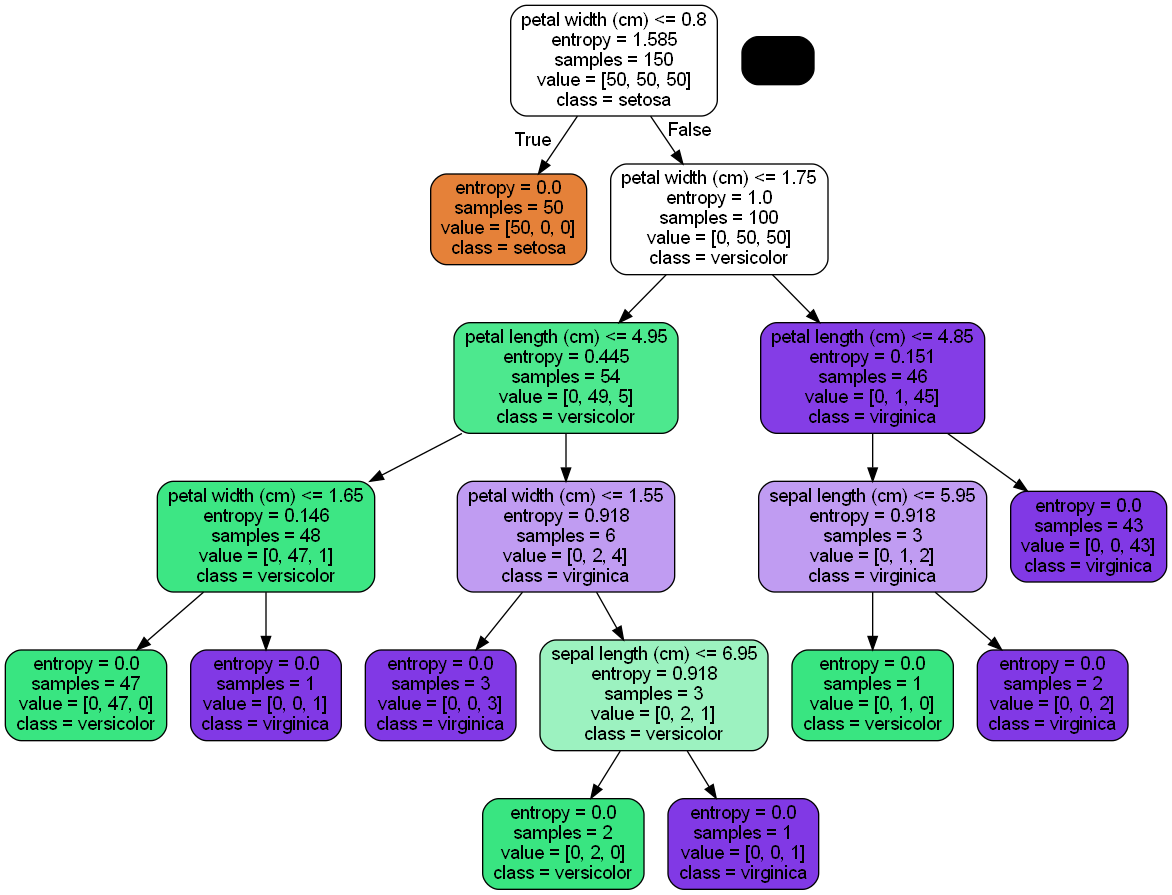

In [10]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
graph.write_pdf('graph_iris.pdf')

True

In [12]:
data = pd.DataFrame({'X1': [True, False, True, False], 
                     'X2': [True, True, False, False], 
                     'Y': [True, True, True, False]})

X = data[['X1', 'X2']]
Y = data['Y']

In [13]:
clf2 = DecisionTreeClassifier(criterion= 'entropy')
clf2.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

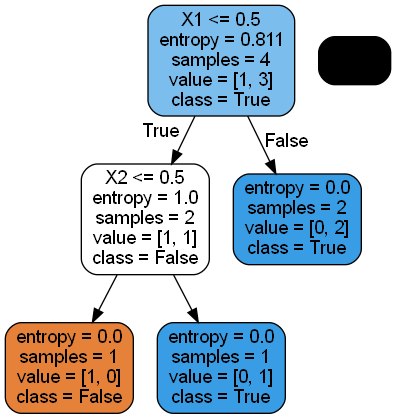

In [14]:
dot_data2 = export_graphviz(clf2, out_file=None,
                          feature_names= X.columns, class_names= ['False' , 'True'], filled=True, rounded= True)
graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())

In [15]:
graph2.write_pdf('graph_or.pdf')

True